In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# hides warning messages
import warnings
warnings.filterwarnings("ignore")


In [2]:
#read data
orders = pd.read_excel('data/muesli_raw_data.xlsx', header=1) #Sonia needs to change the path
#df = pd.read_csv('data/muesli_csv.csv', header=1)
#df = pd.read_csv('/Users/linaperez/downloads/5 - Muesli Project raw data - Orders.csv', header=1) #Sonia needs to change the path
orders.head(2)


,Index,Order ID,Order Date,Ship mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,27.0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3.0,0.0,11.7741
1,45.0,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2.0,0.0,19.7714


In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Index           9994 non-null   float64       
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship mode       9994 non-null   object        
 4   Customer ID     9994 non-null   object        
 5   Customer Name   9994 non-null   object        
 6   Origin Channel  9994 non-null   object        
 7   Country/Region  9994 non-null   object        
 8   City            9994 non-null   object        
 9   State           9994 non-null   object        
 10  Postal Code     9983 non-null   float64       
 11  Region          9994 non-null   object        
 12  Category        9994 non-null   object        
 13  Sub-Category    9994 non-null   object        
 14  Product ID      9994 non-null   object        
 15  Sale

In [4]:
#clean orders df
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(" ","_")
orders.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,27.0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3.0,0.0,11.7741
1,45.0,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2.0,0.0,19.7714


In [5]:
#create arrival df
arrival= pd.read_excel('data/muesli_raw_data.xlsx', sheet_name='Campaign Data')

#clean arrival df
arrival.columns = arrival.columns.str.lower()
arrival.columns = arrival.columns.str.replace(" ","_")
arrival.head(2)

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron


In [6]:
arrival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           333 non-null    object        
 1   arrival_scan_date  333 non-null    datetime64[ns]
 2   customer_name      333 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.9+ KB


In [7]:
#create truck df
truck = pd.read_excel('data/muesli_raw_data.xlsx', sheet_name='Order Process Data')

#clean truck df
truck.columns = truck.columns.str.lower()
truck.columns = truck.columns.str.replace(" ","_")
truck.head(2)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074.0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919.0,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing


In [8]:
truck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              5899 non-null   float64       
 1   order_id            5899 non-null   object        
 2   order_date          5899 non-null   datetime64[ns]
 3   on_truck_scan_date  5899 non-null   datetime64[ns]
 4   ship_mode           5899 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 230.6+ KB


In [9]:
#create ready_pickup df
ready_pickup = pd.read_excel('data/muesli_raw_data.xlsx', sheet_name='InternData Study')

#clean ready_pickup df
ready_pickup.columns = ready_pickup.columns.str.lower()
ready_pickup.columns = ready_pickup.columns.str.replace(" ","_")
ready_pickup.head(2)

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03


In [10]:
ready_pickup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            290 non-null    object        
 1   ready_to_ship_date  290 non-null    datetime64[ns]
 2   pickup_date         290 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.9+ KB


In [11]:
#joining orders and arrivals = df1
df1= pd.merge(orders, arrival, on= "order_id", how= "inner")
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              668 non-null    float64       
 1   order_id           668 non-null    object        
 2   order_date         668 non-null    datetime64[ns]
 3   ship_mode          668 non-null    object        
 4   customer_id        668 non-null    object        
 5   customer_name_x    668 non-null    object        
 6   origin_channel     668 non-null    object        
 7   country/region     668 non-null    object        
 8   city               668 non-null    object        
 9   state              668 non-null    object        
 10  postal_code        668 non-null    float64       
 11  region             668 non-null    object        
 12  category           668 non-null    object        
 13  sub-category       668 non-null    object        
 14  product_id

In [12]:
df1.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name_x,origin_channel,country/region,city,state,...,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date,customer_name_y
0,252.0,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,West,Special Projects Muesil,Gluten Free,TEC-AC-10003832,3347.37,13.0,0.0,636.0003,2019-09-23,Kelly Collister
1,251.0,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,West,Power Muesli,Nuts and more,OFF-PA-10004569,7.61,1.0,0.0,3.5767,2019-09-23,Kelly Collister


In [13]:
#df1 has order dates and arrivals for the gerneral lead time kpi
df1 = df1[["order_id", "order_date", "arrival_scan_date"]]

#create columns for order dates
df1["order_year"]=df1["order_date"].dt.year
df1["order_month"]=df1["order_date"].dt.month
df1["order_weekday"]=df1["order_date"].dt.dayofweek

#create columns for arrival
df1["arrival_year"]=df1["arrival_scan_date"].dt.year
df1["arrival_month"]=df1["arrival_scan_date"].dt.month
df1["arrival_weekday"]=df1["arrival_scan_date"].dt.dayofweek

#create columns for day difference
df1["day_dif_order"]= (df1["arrival_scan_date"]-df1["order_date"]).dt.days

In [14]:
df1.head()

,order_id,order_date,arrival_scan_date,order_year,order_month,order_weekday,arrival_year,arrival_month,arrival_weekday,day_dif_order
0,CA-2019-145625,2019-09-11,2019-09-23,2019,9,2,2019,9,0,12
1,CA-2019-145625,2019-09-11,2019-09-23,2019,9,2,2019,9,0,12
2,CA-2019-162138,2019-04-23,2019-05-06,2019,4,1,2019,5,0,13
3,CA-2019-162138,2019-04-23,2019-05-06,2019,4,1,2019,5,0,13
4,CA-2019-169166,2019-05-09,2019-05-20,2019,5,3,2019,5,0,11


In [15]:
leadtime= df1.groupby("day_dif_order").order_id.count()

<AxesSubplot:>

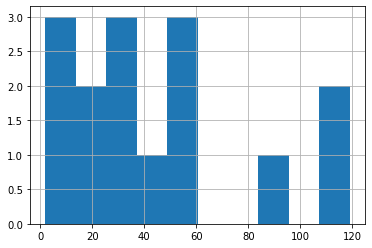

In [16]:
leadtime.hist()

In [17]:
#inspecting duplicates
duplicates_df1 = df1[df1.duplicated(keep=False)].shape
print(duplicates_df1[0])

duplicates_arrival = arrival[arrival.duplicated(keep=False)].shape
print(duplicates_arrival[0])

duplicates_truck = truck[truck.duplicated(keep=False)].shape
print(duplicates_truck[0])

duplicates_ready_pickup = ready_pickup[ready_pickup.duplicated(keep=False)].shape
print(duplicates_ready_pickup[0])
# 147 of 290 rows are duplicated in the ready_pickup df

497
0
0
147


In [18]:
#we don't need to join orders with truck because the 5899 entries already have both 
#the order_date and the truck_date :D

truck['truck_day_dif'] = (truck['on_truck_scan_date'] - truck['order_date']).dt.days
truck.head()


,row_id,order_id,order_date,on_truck_scan_date,ship_mode,truck_day_dif
0,3074.0,CA-2019-125206,2019-01-03,2019-01-07,Express,4
1,4919.0,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,7
2,4920.0,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,7
3,8604.0,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,6
4,8605.0,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,6


In [21]:
# leadtime_muesli is the df for the second KPI
leadtime_muesli = truck.groupby('truck_day_dif').row_id.count()
leadtime_muesli.sort_values(ascending=False)

truck_day_dif
7     1165
8     1022
6      765
5      602
9      565
4      435
3      373
10     318
1      248
2      222
0      152
11      26
12       6
Name: row_id, dtype: int64

In [31]:
#join arrival with ready_pickup
#first drop the duplicates from ready_pickup

ready_pickup.drop_duplicates().reset_index()
#df3 must have 204 rows
df3 = pd.concat([ready_pickup, arrival], axis=1)
df3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            290 non-null    object        
 1   ready_to_ship_date  290 non-null    datetime64[ns]
 2   pickup_date         290 non-null    datetime64[ns]
 3   order_id            333 non-null    object        
 4   arrival_scan_date   333 non-null    datetime64[ns]
 5   customer_name       333 non-null    object        
dtypes: datetime64[ns](3), object(3)
memory usage: 18.2+ KB
